### Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

**Answer:**

**Boosting** is an ensemble learning technique that combines multiple simple models, known as "weak learners," into a single, powerful predictive model or "strong learner." Unlike bagging methods that build models independently, boosting builds them **sequentially**.

**How it improves weak learners:**

The core idea is that each new model in the sequence focuses on correcting the mistakes made by its predecessors. Here’s the process:
1.  A simple base model (a weak learner, often a small decision tree) is trained on the data.
2.  The algorithm identifies the data points that this first model misclassified.
3.  It then trains a **second model**, giving **more weight** or focus to the data points that were previously misclassified, forcing the new model to pay special attention to getting them right.
4.  This process is repeated for a specified number of models, with each one learning from the residual errors of the one before it.

By the end, the final prediction is a weighted combination of all the models' predictions. This sequential, error-correcting process allows the ensemble to effectively reduce **bias**, turning a collection of simple models that are only slightly better than random guessing into a highly accurate and robust final model.

### Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

**Answer:**

Both AdaBoost (Adaptive Boosting) and Gradient Boosting are sequential boosting algorithms, but they differ in how they learn from the errors of previous models.

**AdaBoost:**
* **Focus:** AdaBoost focuses on the **misclassified data points**. 
* **Mechanism:** In each iteration, it increases the **weights** of the training instances that were incorrectly classified by the previous model. The next model in the sequence is then trained on this updated, re-weighted dataset, forcing it to concentrate on the more difficult examples. The final prediction is a weighted vote of all the learners, where better-performing learners get a higher say.

**Gradient Boosting:**
* **Focus:** Gradient Boosting focuses on the **residual errors** of the previous model.
* **Mechanism:** Instead of changing the weights of the data points, it fits each new model to the errors made by the previous one. For example, in regression, if the true value was 10 and the first model predicted 8, the residual error is 2. The next model is then trained to predict this residual of 2. The final prediction is the sum of the predictions from all models.

| Feature | AdaBoost | Gradient Boosting |
| :--- | :--- | :--- |
| **Error Correction** | Adjusts weights of misclassified data points. | Fits new models to the residual errors of the predecessor. |
| **Core Idea** | Focuses on difficult examples. | Focuses on minimizing a loss function (like MSE). |
| **Flexibility** | Less flexible; typically uses decision stumps. | Highly flexible; can optimize any differentiable loss function. |

### Question 3: How does regularization help in XGBoost?

**Answer:**

Regularization is a key feature in XGBoost (Extreme Gradient Boosting) that helps to **prevent overfitting** and improve the model's generalization performance. It does this by adding a penalty term to the loss function that discourages the model from becoming too complex.

XGBoost includes two types of regularization:

1.  **L1 Regularization (Lasso Regression):** This is controlled by the `reg_alpha` hyperparameter. It adds a penalty proportional to the **absolute value of the leaf weights**. This has the effect of pushing the weights of less important features towards zero, which can help with feature selection.

2.  **L2 Regularization (Ridge Regression):** This is controlled by the `reg_lambda` hyperparameter. It adds a penalty proportional to the **square of the leaf weights**. This makes the model's weights smaller and more evenly distributed, which helps to create a smoother and less complex decision function.

By incorporating these penalties, XGBoost's objective function balances two goals: minimizing the loss (how well the model fits the data) and minimizing the complexity of the model. This trade-off prevents the trees from growing too complex and learning the noise in the training data, resulting in a more robust model that performs better on unseen data.

### Question 4: Why is CatBoost considered efficient for handling categorical data?

**Answer:**

CatBoost (Categorical Boosting) is considered highly efficient for handling categorical data because it implements a sophisticated and automated technique called **Ordered Target Statistics** (or Ordered TS).

Traditional methods like one-hot encoding can lead to a massive increase in the number of features (the "curse of dimensionality") if a category has many unique values. Other methods, like simple target encoding, can suffer from **target leakage**, where information from the target variable leaks into the training process, leading to overfitting.

CatBoost's Ordered TS solves these problems:

1.  **Avoids Target Leakage:** For each data point, it calculates the target statistic (e.g., the average target value for a category) using only the data points that appeared **before** it in a randomly permuted dataset. This prevents the model from being influenced by its own target value.
2.  **Reduces Overfitting:** This ordered approach acts as a form of regularization, creating a more robust encoding that generalizes better to new data.
3.  **Automated Handling:** The entire process is handled internally by the algorithm. You can simply pass your categorical features to the model without any manual preprocessing like one-hot encoding, which greatly simplifies the workflow and reduces the risk of implementation errors.

### Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

**Answer:**

Boosting techniques are generally preferred over bagging methods in applications where **predictive accuracy is the absolute top priority**, and you are willing to spend more computational resources and time on hyperparameter tuning. Bagging (like Random Forest) is often a great starting point, but boosting often wins in competitive scenarios.

Some real-world applications include:

1.  **Credit Scoring and Fraud Detection:** In finance, the cost of a misclassification (e.g., approving a fraudulent transaction or a bad loan) is very high. Boosting's ability to minimize bias and achieve state-of-the-art accuracy makes it the preferred choice for building highly reliable risk models.

2.  **Medical Diagnosis:** In tasks like predicting the presence of a disease from patient data, maximizing the model's predictive power is critical. Boosting algorithms are often used to build highly accurate diagnostic tools to support clinical decisions.

3.  **Customer Churn Prediction:** Companies want to identify customers who are likely to leave their service with the highest possible accuracy. Boosting models can capture subtle patterns in customer behavior that simpler models might miss, leading to more effective retention campaigns.

4.  **Search Engine Ranking:** Major search engines use sophisticated boosting algorithms (like LambdaMART, a form of gradient boosting) to rank search results. The model learns to rank pages by minimizing the errors in the ranking order, a task for which gradient boosting is exceptionally well-suited.

### Question 6: Write a Python program to train an AdaBoost Classifier on the Breast Cancer dataset and print the model accuracy.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train an AdaBoost Classifier
# By default, it uses a Decision Tree with max_depth=1 (a stump) as the base learner.
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_clf.predict(X_test)

# Print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("OUTPUT:")
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

OUTPUT:
AdaBoost Classifier Accuracy: 0.9649


### Question 7: Write a Python program to train a Gradient Boosting Regressor on the California Housing dataset and evaluate performance using R-squared score.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = gb_regressor.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("OUTPUT:")
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

OUTPUT:
Gradient Boosting Regressor R-squared Score: 0.7803


### Question 8: Write a Python program to train an XGBoost Classifier on the Breast Cancer dataset, tune the learning rate using GridSearchCV, and print the best parameters and accuracy.

In [5]:
# You may need to install xgboost first: pip install xgboost
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid for the learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
print("Running GridSearchCV to find the best learning rate...")
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("OUTPUT:")
print("\n--- Tuning Complete ---")
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")

Running GridSearchCV to find the best learning rate...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
OUTPUT:

--- Tuning Complete ---
Best Parameters Found: {'learning_rate': 0.05}
Best Cross-Validation Score: 0.9650
Final Accuracy on Test Set: 0.9591


### Question 9: Write a Python program to train a CatBoost Classifier and plot the confusion matrix using seaborn.

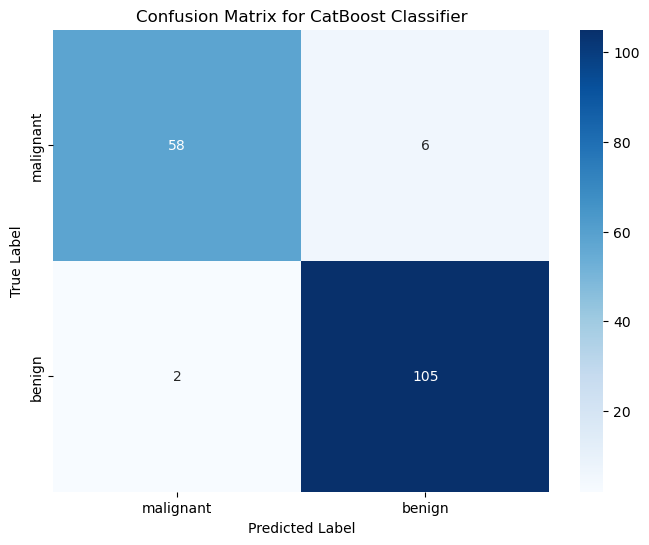

In [4]:
# You may need to install catboost and seaborn: pip install catboost seaborn
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
class_names = cancer.target_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a CatBoost Classifier
cat_clf = cb.CatBoostClassifier(iterations=200, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Make predictions
y_pred = cat_clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

### Question 10: You're working for a FinTech company trying to predict loan default. Describe your step-by-step data science pipeline using boosting techniques.

**Answer:**

Predicting loan default is a critical task where accuracy and robustness are essential. Here is the step-by-step data science pipeline I would implement using boosting techniques.

**1. Data Preprocessing & Handling Missing/Categorical Values**

* **Missing Values:** For numerical features (e.g., `income`, `loan_amount`), I would impute missing values using the **median**, as it's robust to outliers. For categorical features (e.g., `employment_type`), I would impute with the **mode** (most frequent category).
* **Categorical Features:** I would not one-hot encode them initially. Instead, I will leverage the advanced handling capabilities of my chosen model (see next step).
* **Feature Scaling:** I would scale all numerical features using `StandardScaler` to bring them to a similar scale, which helps gradient-based algorithms converge faster.

**2. Choice between AdaBoost, XGBoost, or CatBoost**

My choice would be **CatBoost**.

* **Justification:** The dataset contains both numeric and categorical features. CatBoost is specifically designed to handle categorical data automatically and efficiently using its internal Ordered Target Statistics encoding. This saves significant preprocessing effort and often leads to better performance than manual encoding. Furthermore, CatBoost is known for its robustness and competitive performance against XGBoost, often with less hyperparameter tuning required.

**3. Hyperparameter Tuning Strategy**

I would use **RandomizedSearchCV** instead of GridSearchCV.

* **Justification:** Boosting models have many hyperparameters. A grid search would be computationally expensive. Randomized search is more efficient as it samples a fixed number of parameter combinations from specified distributions, often finding a very good model faster. I would tune key parameters like `iterations`, `learning_rate`, `depth`, and `l2_leaf_reg` (for regularization).

**4. Evaluation Metrics**

Since the dataset is imbalanced (loan defaults are rare), accuracy is a misleading metric. I would choose:

* **AUC-PR (Area Under the Precision-Recall Curve):** This is the most important metric for imbalanced classification. It evaluates the trade-off between precision and recall and is more informative than the standard ROC-AUC in this context.
* **Recall (for the 'default' class):** This is critical from a business perspective. We want to identify as many potential defaulters as possible, even if it means flagging some good customers for review (a manageable cost). High recall minimizes the risk of costly False Negatives.
* **F1-Score:** To get a single, balanced measure of the model's performance.

**5. How the business would benefit from your model**

A highly accurate loan default prediction model provides immense business value:

* **Reduced Financial Loss:** The primary benefit is the direct reduction of losses from bad loans. By accurately identifying high-risk applicants, the company can deny loans or adjust terms (e.g., higher interest rates), safeguarding its capital.
* **Improved Risk Management:** The model provides a consistent, data-driven framework for assessing risk, reducing reliance on subjective human judgment and improving the overall health of the loan portfolio.
* **Competitive Advantage:** A more efficient and accurate lending process allows the company to offer better rates to low-risk customers and make faster lending decisions, making it more competitive in the market.